# Solid Earth tides at Los Angeles, USA from 2001-2021

In [1]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt, ticker, dates as mdates
import pysolid
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Downloads')
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/Downloads


## Calculate SET

In [2]:
# inputs
lat, lon = 34.0, -118.0 # Los Angles, CA
step_sec = 60 * 10
dt0 = dt.datetime(2001,1,1,4,0,0)
#dt0 = dt.datetime(2020,1,1,4,0,0)
dt1 = dt.datetime(2021,1,1,2,0,0)

# run
dt_out, tide_e, tide_n, tide_u = pysolid.calc_solid_earth_tides_point(
    lat, lon, dt0, dt1,
    step_sec=step_sec,
    display=False,
    verbose=False,
)

PYSOLID: calculate solid Earth tides in east/north/up direction
PYSOLID: lot/lon: 34.0/-118.0 degree
PYSOLID: start UTC: 2001-01-01T04:00:00
PYSOLID: end   UTC: 2021-01-01T02:00:00
PYSOLID: time step: 600 seconds


## Plot - time-series of SET up components

save figure to file: SET_TS_Up.png


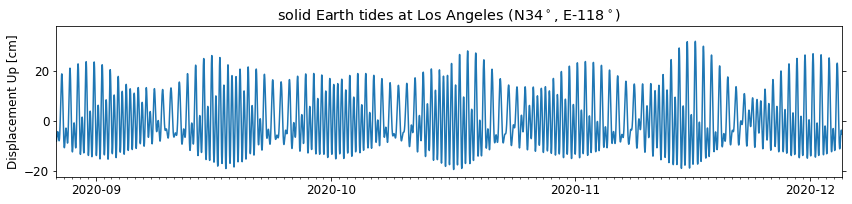

In [3]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12, 3])
ax.plot(dt_out, tide_u*100, lw=1.5)

# axis format
ax.tick_params(which='both', direction='out', bottom=True, top=False, left=True, right=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_ylabel('Displacement Up [cm]')
ax.set_title(r'solid Earth tides at Los Angeles (N34$^\circ$, E-118$^\circ$)')
ax.set_xlim(dt.datetime(2020,8,27), dt.datetime(2020,12,5))
fig.tight_layout()

# output
out_fig = 'SET_TS_Up.png'
print('save figure to file:', out_fig)
#fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()

## Plot - power spectrum

The same code as:
```python
pysolid.plot_power_spectral_density4tides(tide_u, sample_spacing=step_sec, out_fig='SET_PSD.png', fig_dpi=600, min_psd=1500)
```

### Semi-diurnal period and diurnal period

save figure to file: /Users/yunjunz/Downloads/SET_PSD.png


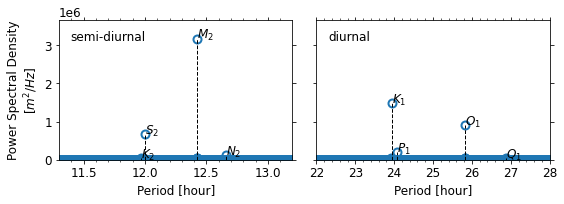

In [4]:
## calc PSD
freq, psd = signal.periodogram(tide_u, fs=1/step_sec, scaling='density')
# get rid of zero in the first element
psd = psd[1:]
freq = freq[1:]
period = 1./3600./freq   # period (hour)

## plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8,3], sharey=True)
for ax in axs:
    ax.plot(period, psd, '.', ms=16, mfc='none', mew=2)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.set_xlabel('Period [hour]')
axs[0].set_xlim(11.3, 13.2)
axs[1].set_xlim(22.0, 28.0)
ax = axs[0]
ax.set_ylabel('Power Spectral Density\n'+r'[$m^2/Hz$]')
ax.set_ylim(0, ymax=axs[0].get_ylim()[1] * 1.1)
#plt.yscale('log')
#ax.yaxis.set_major_locator(ticker.FixedLocator([0,50e3,100e3,150e3]))
#ax.set_yticklabels(['0','50k','100k','150k'])
fig.tight_layout()

# Tidal constituents
for ax in axs:
    pysolid.point.add_tidal_constituents(ax, period, psd, min_psd=0.02e6)
axs[0].annotate('semi-diurnal', xy=(0.05,0.85), xycoords='axes fraction')
axs[1].annotate('diurnal',      xy=(0.05,0.85), xycoords='axes fraction')

# output
out_fig = 'SET_PSD.png'
if out_fig:
    print('save figure to file:', os.path.abspath(out_fig))
    fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()

### Short period

save figure to file: /Users/yunjunz/Downloads/SET_PSD_short.png


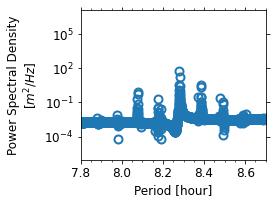

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,3], sharey=True)
ax.plot(period, psd, '.', ms=16, mfc='none', mew=2)

# axis format
ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_xlabel('Period [hour]')
ax.set_ylabel('Power Spectral Density\n'+r'[$m^2/Hz$]')
ax.set_xlim(7.8, 8.7)
plt.yscale('log')
fig.tight_layout()

# output
out_fig = 'SET_PSD_short.png'
if out_fig:
    print('save figure to file:', os.path.abspath(out_fig))
    fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()

### Long period

save figure to file: /Users/yunjunz/Downloads/SET_PSD_long.png


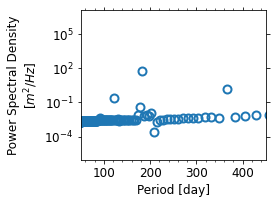

In [6]:
# get period in days
period = 1./(3600.*24.)/freq   # period (hour)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,3], sharey=True)
ax.plot(period, psd, '.', ms=16, mfc='none', mew=2)

# axis format
ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_xlabel('Period [day]')
ax.set_xlim(50, 450)
ax.set_ylabel('Power Spectral Density\n'+r'[$m^2/Hz$]')
plt.yscale('log')
fig.tight_layout()

# output
out_fig = 'SET_PSD_long.png'
if out_fig:
    print('save figure to file:', os.path.abspath(out_fig))
    fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()